# Predicting heart diseases based on various factors and determining the most important factor in predicting if heart disease will occur

In [293]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as plot
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import sklearn
import io

### Data Preparation And Cleaning

In [294]:
#uploaded = files.upload()

In [295]:
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Upon initial exploration of the dataset, we see that there are 303 rows of data and and 14 columns of data. Out of the 14 columns, there are 13 variables that include numeric and categorical variables that have an effect on the chance heart disease.The presence of heart diseases or not is in the "target" column.

## Explaining the variables in the dataset
### Age: The age of the person

### Sex: Gender of the person
0: Male

1: Female

### Cp: Chest pain types
0: asymptomatic

1: atypical angina

2: non-anginal pain

3: typical angina

### Trestbps: Resting blood pressure levels in mm Hg 

### Chol: Cholestrol level in mg/dl

### Fbs: Fasting blood sugar > 120 mg/dl 
0 = false

1 = true

### Restecg: Resting electrocardiographic results 
0: showing probable or definite left ventricular hypertrophy by Estes’ criteria

1: normal

2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

### thalach: Maximum heart rate achieved

### exang: Exercise induced angina 
0 = no

1 = yes

### oldpeak: ST depression induced by exercise relative to rest.‘ST’ relates to positions on the ECG plot.

### slope: The slope of the peak exercise ST segment 
0: downsloping

1: flat

2: upsloping

### ca: number of major vessels (0-4) 

### thal: A blood disorder called thalassemia

1: fixed defect (no blood flow in some part of the heart)

2: normal blood flow

3: reversible defect (a blood flow is observed but it is not normal)

### Target: Target column 
0 = No

1 = Yes

In [296]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [297]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Null values will distort the accuracy of our data. Upon exploration, we realize that the data set has no null values, hence we do not need to populate any null values.

---



In [298]:
data.groupby('target').size()

target
0    138
1    165
dtype: int64

There are 165 occurences of heart disease occuring and 138 occurence of heart disease not occuring in this dataset out of 303 data points 

In [299]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Exploring the basic stastics of our dataset. It is important to note that since the target column is the one we are trying to predict, the statistics from the target column is not applicable to our analysis.

### Exploratory Data Analysis

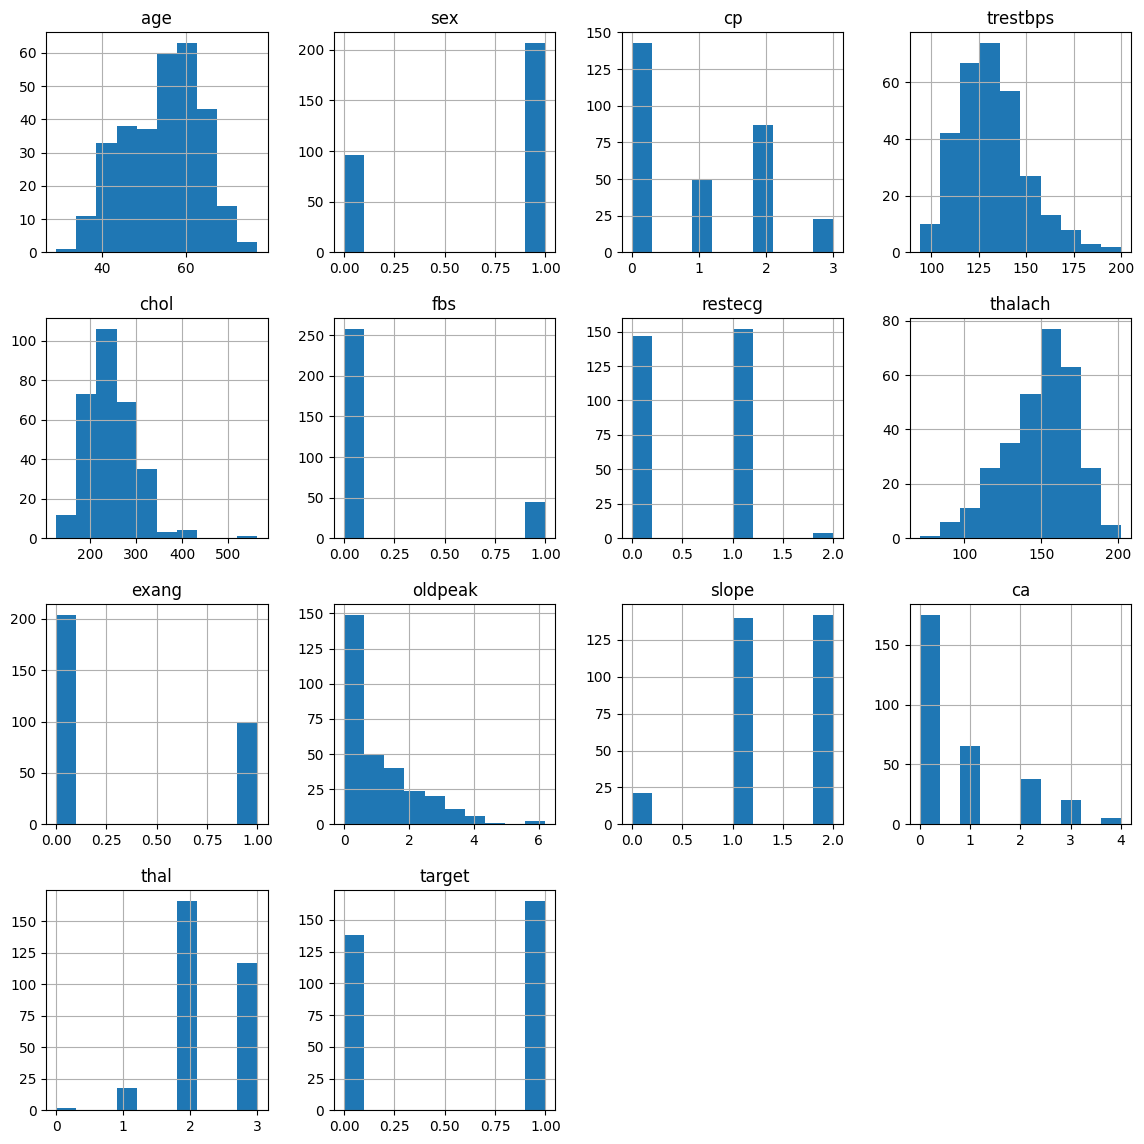

In [300]:
data.hist(figsize=(14,14))
plt.show()

### Exploring the frequency of each variable in the data set using a histogram, we deduced that 

Age: The maximum number of people in the dataset are of the age of 60

Sex: The number of females are almost twice the number of males in the dataset

cp: Chest pain type 0 has the highest frequency in the dataset

Trestbps: Most number of people have a resting blood pressure between 125-137

Chol: Most number of people have a cholestrol level between 225-250

fbs: There are more occurence of 0 (blood sugar levels <120) than 1 (blood sugar>= 120)

restecg: The number of occurence of levels 0 and 1 are similar, 2 has the least occurence of the type of restecg

thalach: Most number of people have a maximum heart rate achieved of 150-160

exang: The frequency of the number of people without Exercise induced angina is greater than the number of people with Exercise induced angina

oldpeak: The highest frequency of oldpeak level is 0

slope: The levels of 1 and 2 have similar frequencies whilst 0 has the lowest frequency

ca: Level 0 has the highest occurence followed by 1, 2, 3 then 4

thal: The highest frequency is at level 2, followed by 3, 1 and 0 

Target: In our dataset, the frequency of having heart disease is greater than the frequency of not having heart disease|


In [301]:
temp=data[['oldpeak','trestbps','age','chol','thalach']]
fig = make_subplots(rows=5)

# Add the box plots to the subplots
fig.add_trace(px.box(data_frame=temp, x='oldpeak').data[0], row=1, col=1)
fig.add_trace(px.box(data_frame=temp, x='trestbps').data[0], row=2, col=1)
fig.add_trace(px.box(data_frame=temp, x='age').data[0], row=3, col=1)
fig.add_trace(px.box(data_frame=temp, x='chol').data[0], row=4, col=1)
fig.add_trace(px.box(data_frame=temp, x='thalach').data[0], row=5, col=1)

# Update the layout and axes labels
fig.update_layout(title='Box Plots of Various Features:',height=900, width=900)

fig.update_yaxes(title_text='Oldpeak (mm)', row=1, col=1)
fig.update_yaxes(title_text='Trestbps (mmHg)', row=2, col=1)
fig.update_yaxes(title_text='Age (years)', row=3, col=1)
fig.update_yaxes(title_text='Chol (mg/dl)', row=4, col=1)
fig.update_yaxes(title_text='Thalach (bpm)', row=5, col=1)

# Show the plot
fig.show()

## Github is not able to display the interactive boxplots made using plotly. Please refer to the image "Boxplot 1" under files uploaded to view the boxplot

### Analysis for the Above Box Plots
Plotting the boxplots for the numeric variables using plotly (something new that we learnt) shows us the quartiles,minimum, maximum, median, upper & lower bound and outliers present in the dataset. The outliers have the ability to skew the data which can affect the accuracy of our prediction. Hence, we dropped the outliers in our data to ensure accurate predictions.

### Removal Of Outliers

In [302]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [303]:
newdata = remove_outlier(data, 'oldpeak')
newdata1 = remove_outlier(newdata, 'chol')
newdata2 = remove_outlier(newdata1,'age')
newdata3 = remove_outlier(newdata2,'trestbps')
finaldata = remove_outlier(newdata3,'thalach')
finaldata

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### 24 Rows of data that contain the outliers were removed from the dataset. Below are the boxplots of the continuous variables with the outliers removed

In [304]:
temp= finaldata[['oldpeak','trestbps','age','chol','thalach']]
fig = make_subplots(rows=5)

# Add the box plots to the subplots
fig.add_trace(px.box(data_frame=temp, x='oldpeak').data[0], row=1, col=1)
fig.add_trace(px.box(data_frame=temp, x='trestbps').data[0], row=2, col=1)
fig.add_trace(px.box(data_frame=temp, x='age').data[0], row=3, col=1)
fig.add_trace(px.box(data_frame=temp, x='chol').data[0], row=4, col=1)
fig.add_trace(px.box(data_frame=temp, x='thalach').data[0], row=5, col=1)

# Update the layout and axes labels
fig.update_layout(title='Box Plots of Various Features:',height=900, width=900)

fig.update_yaxes(title_text='Oldpeak (mm)', row=1, col=1)
fig.update_yaxes(title_text='Trestbps (mmHg)', row=2, col=1)
fig.update_yaxes(title_text='Age (years)', row=3, col=1)
fig.update_yaxes(title_text='Chol (mg/dl)', row=4, col=1)
fig.update_yaxes(title_text='Thalach (bpm)', row=5, col=1)

# Show the plot
fig.show()

## Github is not able to display the interactive boxplots made using plotly. Please refer to the image "Boxplot 2" under files uploaded to view the boxplot

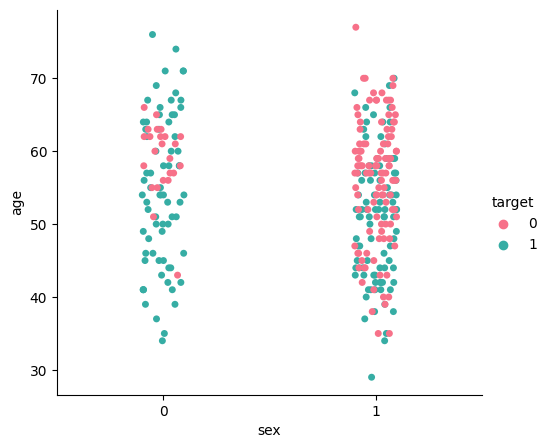

In [305]:
sns.catplot(data=data, x='sex', y='age',  hue='target', palette='husl')
plt.subplots_adjust(bottom=0.2) 

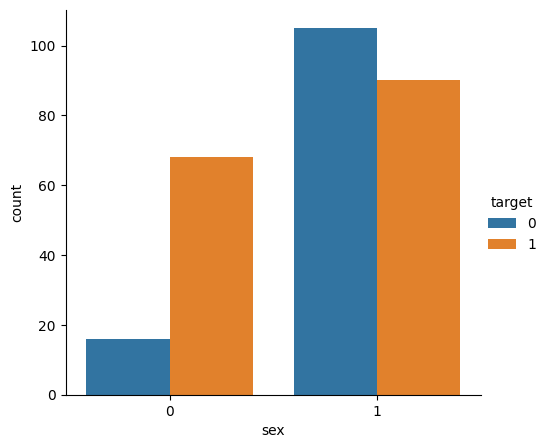

In [306]:
sns.catplot(x='sex', hue='target', kind='count', data=finaldata)
plt.subplots_adjust(bottom=0.2) 

In [307]:
finaldata.groupby('sex').size()

sex
0     84
1    195
dtype: int64

## Analysis:
From the 2 plots,that males (0) are more susceptible to heart diseases than females (1) as there are alot more green plots than red plots for males compared to females. However there are more than twice the number of females compared to males which causes the total count for females having heart disease to be greater than males.

In [308]:
finaldata.groupby('cp').size()

cp
0    127
1     49
2     83
3     20
dtype: int64

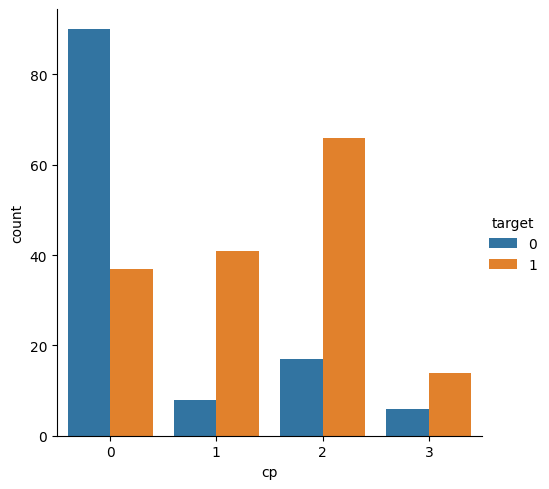

In [309]:
sns.catplot(x='cp', hue='target', kind='count', data=finaldata)

## Analysis:
The plot shows that people with chest pain of type 0 have the highest chance of not having a heart disease. People with chest pain types 1,2,3 have a greater chance of having heart diseases compared to not having heart disease. This makes chest pain a type an important variable for our prediction.

In [310]:
finaldata.groupby('fbs').size()

fbs
0    240
1     39
dtype: int64

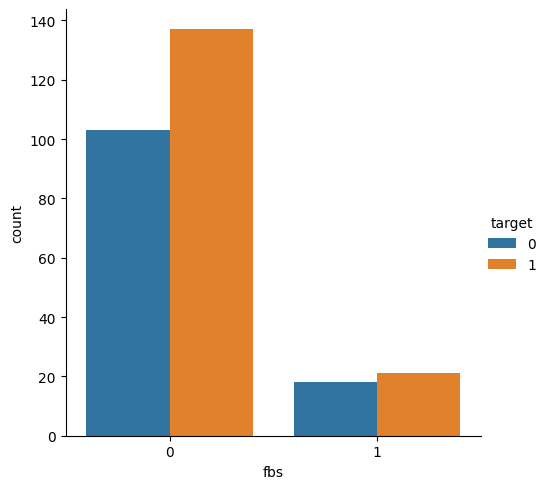

In [311]:
sns.catplot(x='fbs', hue='target', kind='count', data=finaldata)

## Analysis:
Plotting fbs (fasting blood suger) against the target variable of having heart disease of not, we can see that when fbs<120 (0) the chance of having a heart disease is greater than not having heart disease. When fbs>120(1), the chance of having heart disease to not having is almost the same. Hence fbs will be an important variable in our prediction.

<Axes: xlabel='target', ylabel='age'>

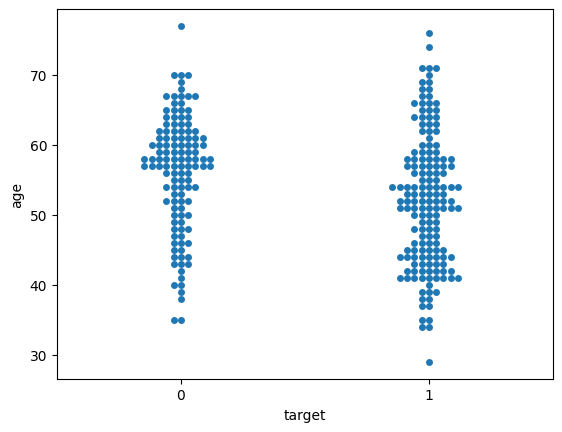

In [312]:
sns.swarmplot(x="target", y="age", data=finaldata,)

## Analysis:
Based on the swarmplot, there doesn't seem to be a relation between age and having heart disease or not as people of every age group seem to have or not have heart diseases and we cannot cut the swarmplot based on a certain threshold to predict if beyond a certain age, a person will definitely have a heart disease or not.

Text(0.5, 1.0, 'Age of patients with heart disease')

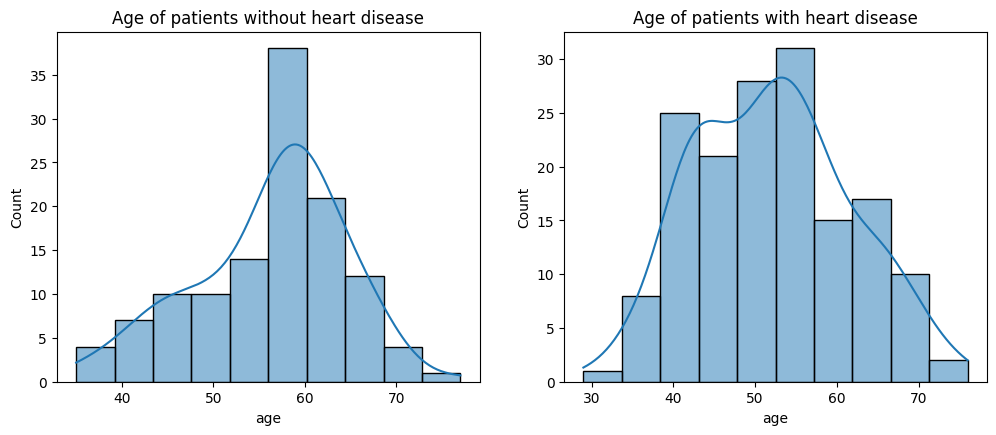

In [313]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.histplot(finaldata[finaldata['target']==0].age, kde = True)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.histplot(finaldata[finaldata['target']==1].age, kde = True)
plt.title('Age of patients with heart disease')

### Analysis
Based on the Kernel Density Estimate above, it can be seen that the highest frequency of the number of patients without heart diseases lies just below the age of 60 whilst the highest frequency of the age of patients with heart diseases lies at the age of 55.

<Axes: xlabel='target', ylabel='chol'>

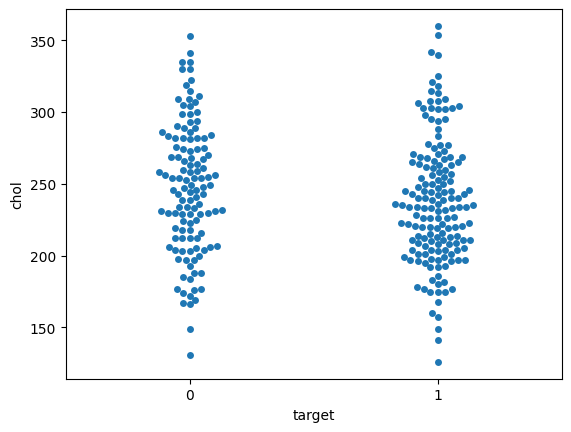

In [314]:
sns.swarmplot(x="target", y="chol", data=finaldata)

## Analysis:
Based on the swarmplot, there doesn't seem to be a clear relation between cholestrol level and having heart disease or not as people at every cholestrol level seem to have or not have heart diseasesand we cannot cut the swarmplot based on a certain threshold to predict if beyond a cholestrol level, a person will definitely have a heart disease or not.

<Axes: xlabel='target', ylabel='trestbps'>

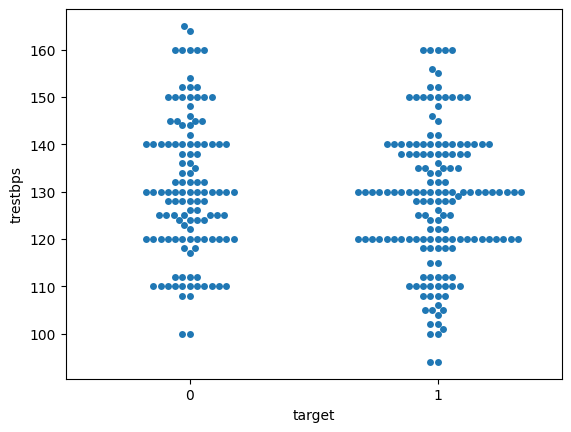

In [315]:
sns.swarmplot(x="target", y="trestbps", data=finaldata)

## Analysis:
Based on the swarmplot, there doesn't seem to be a clear relation between trestbps level and having heart disease or not as people at every trestbps level seem to have or not have heart diseases and we cannot cut the swarmplot based on a certain threshold to predict if beyond a trestbps value, a person will definitely have a heart disease or not.

<Axes: xlabel='target', ylabel='thalach'>

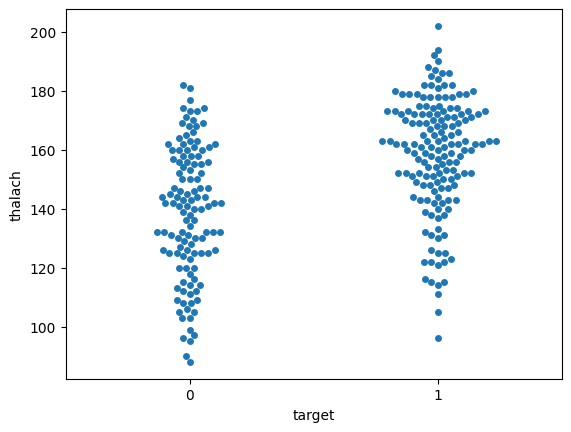

In [316]:
sns.swarmplot(x="target", y="thalach", data=finaldata)

## Analysis:
Based on the swarmplot, there seems to be a relationship between thalach and having heart disease. Below the thalach level of 140, there is a greater likelyhood that one will not have the heart disease compared to having the disease. Hence thalach will be an important variable for our prediction.

Text(0.5, 1.0, 'Max heart rate of patients without heart disease')

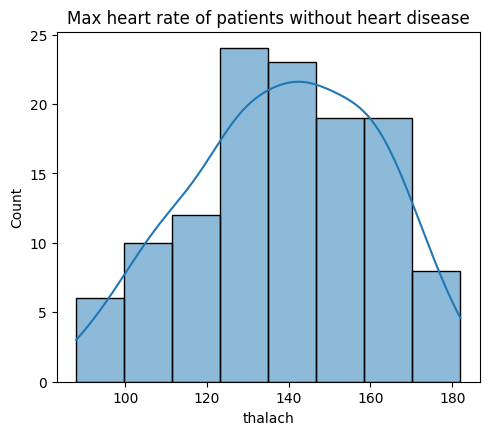

In [317]:
plt.figure(figsize=(12,10))
plt.subplot(223)
sns.histplot(finaldata[finaldata['target']==0].thalach, kde = True )
plt.title('Max heart rate of patients without heart disease')

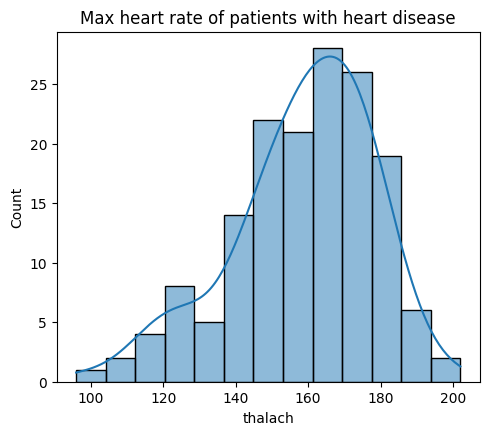

In [318]:
plt.figure(figsize=(12,10))
plt.subplot(224)
sns.histplot(finaldata[finaldata['target']==1].thalach, kde = True )
plt.title('Max heart rate of patients with heart disease')
plt.show()

### Analysis
Based on the 2 Kernel Density Estimates above, the highest frequency of the maximum heart rate of patients (thalach) that have heart diseases is 165 and is higher than the highest frequency of the maximum heart rate of patients who do not have heart diseases which is about 125, hence we can deduce that thalach (maximum heart rate) will be an important variable for our prediction

<Axes: xlabel='target', ylabel='oldpeak'>

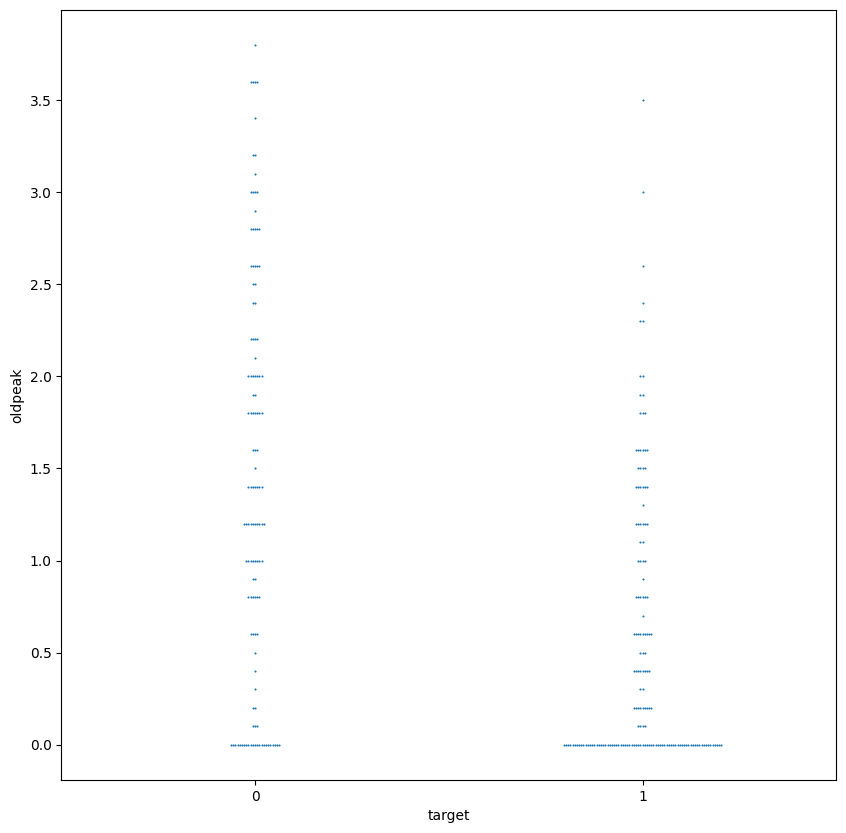

In [319]:
plt.figure(figsize=(10,10))
sns.swarmplot(x="target", y="oldpeak", data=finaldata, size=1.5)

## Analysis:
Based on the swarmplot, there seems to be a clearer relationship between oldpeak and having heart disease. Above the oldpeak level of 2, there is a greater likelyhood that one will not have the heart disease compared to having the disease. Hence oldpeak will be an important variable in predicting heart disease.

In [320]:
finaldata.groupby('ca').size()

ca
0    162
1     63
2     33
3     16
4      5
dtype: int64

<Axes: xlabel='ca', ylabel='count'>

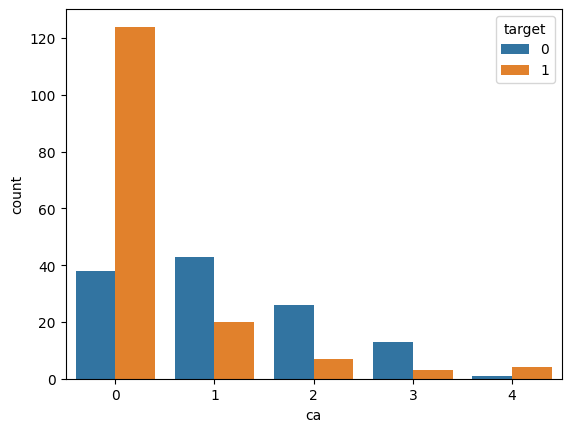

In [321]:
sns.countplot(x='ca',hue='target',data=finaldata)

## Analysis:
The barplots show that when ca is 0 and 4, the chances of having heart diseases is greater than the chance of not having a heart disease. But when the ca is 1,2 or 3, the chance of not having a heart disease is greater than the chance of having a heart disease. Hence ca should be an important variable in predicting heart disease. 

In [322]:
finaldata.groupby('thal').size()

thal
0      2
1     16
2    160
3    101
dtype: int64

<Axes: xlabel='thal', ylabel='count'>

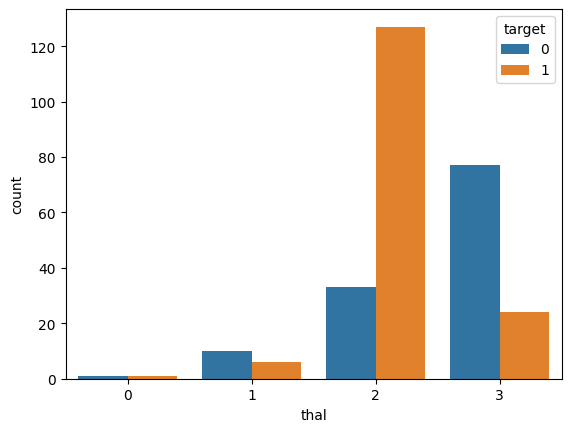

In [323]:
sns.countplot(x='thal', data=finaldata, hue='target')

## Analysis:
The barplots show that when thal value is 2, chance of having heart disease is higher but when thal value is 1 or 3, chance of not having heart disease is higher. Hence thal will be an important variable in predicting heart diseases.

In [324]:
finaldata.groupby('restecg').size()

restecg
0    132
1    145
2      2
dtype: int64

<Axes: xlabel='restecg', ylabel='count'>

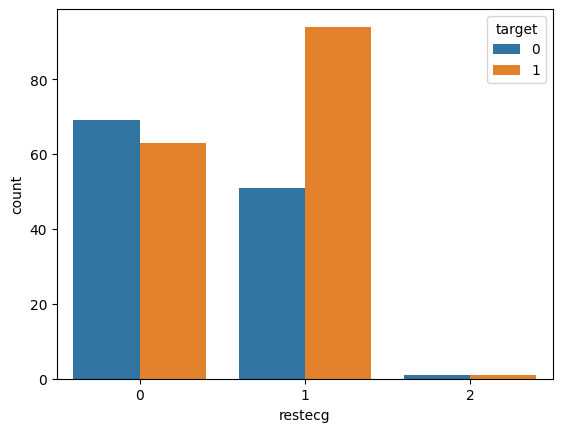

In [325]:
sns.countplot(x='restecg', data=finaldata, hue='target')

## Analysis:
The barplots show that when restecg value is 1 chance of having heart disease is higher but when restecg value is 0, chance of not having heart disease is higher. Hence restecg will be an important variable for predicting heart disease.

In [326]:
finaldata.groupby('exang').size()

exang
0    192
1     87
dtype: int64

<Axes: xlabel='exang', ylabel='count'>

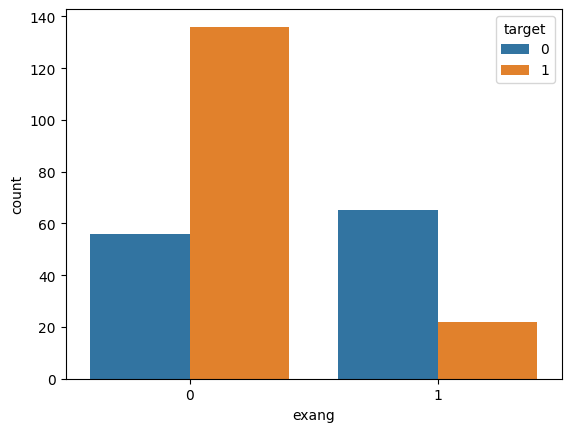

In [327]:
sns.countplot(x='exang', data=finaldata, hue='target')

## Analysis:
The barplots show that when exang value is 0 chance of having heart disease is higher but when restecg value is 1, chance of not having heart disease is higher. Hence exang will be an important variable for our prediction.

In [328]:
finaldata.groupby('slope').size()

slope
0     15
1    127
2    137
dtype: int64

<Axes: xlabel='slope', ylabel='count'>

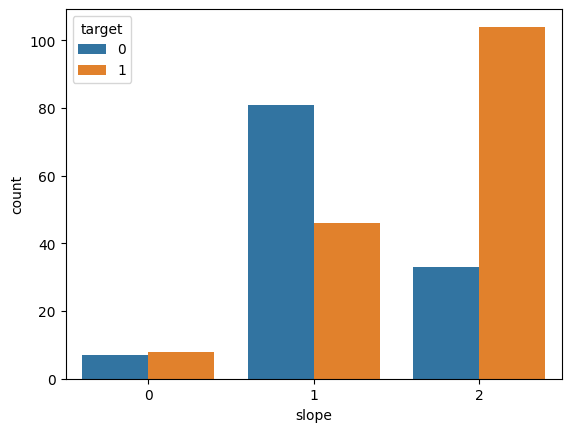

In [329]:
sns.countplot(x='slope', data=finaldata, hue='target')

## Analysis:
The barplots show that when slope value is 0 and 2, the chance of having heart disease is higher but when slope value is 1, chance of not having heart disease is higher. Hence slope will be an important variable for our prediction.


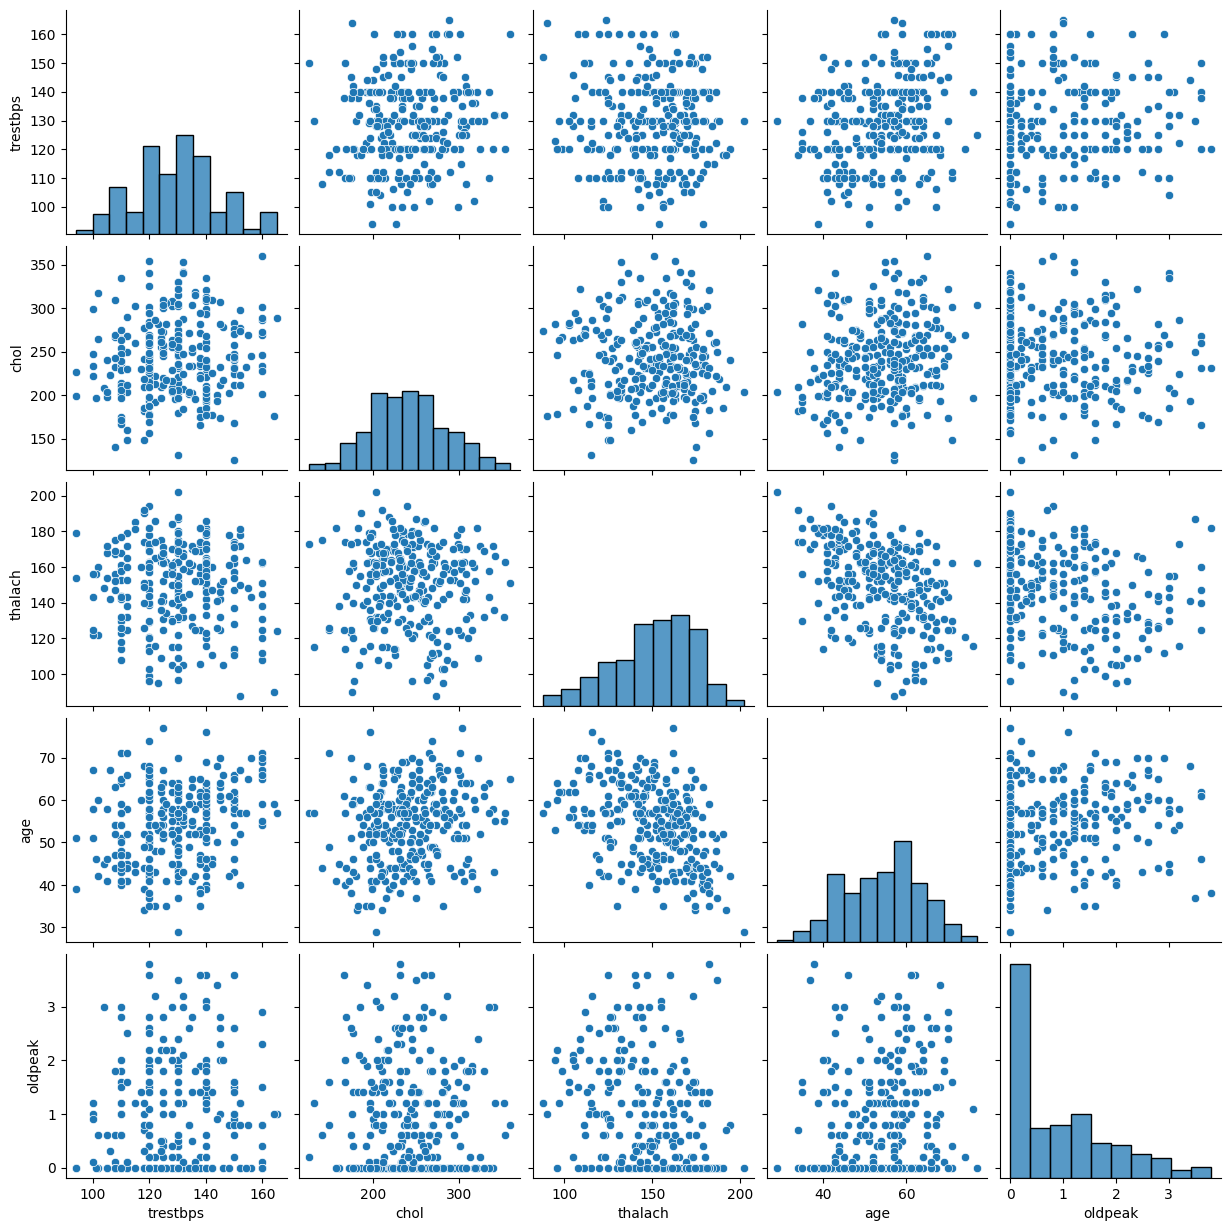

In [330]:
numeric_columns=['trestbps','chol','thalach','age','oldpeak']

sns.pairplot(finaldata[numeric_columns])

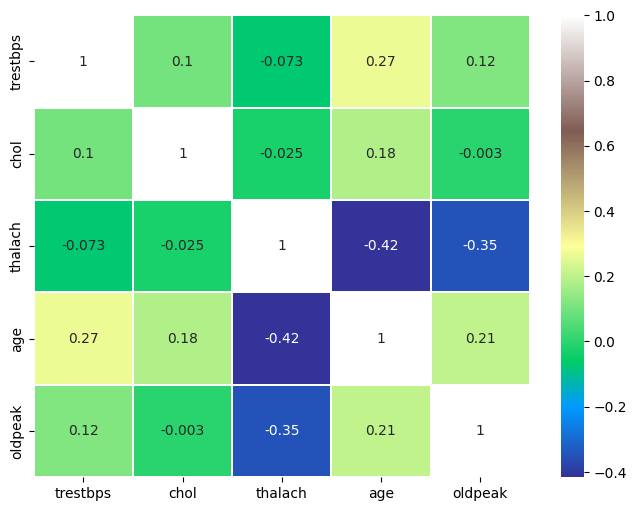

In [331]:
sns.heatmap(finaldata[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

We plot a multi variate pairplot of the continous variables to analyse if there is a correlation between any of the continuous variables. Based on the pairplot and the correlation matrix, we can conclude that there is no strong correlation between any of the numeric variables

Based on our exploratory data analysis that we conducted to analyze if there is a relationship between any of the variables and chance of having heart disease, we deduced that categorical variables (represented by countplots) have a more significant relationship with heart disease rate compared to the continous numerical variables (represented by swarmplots). Hence the categorical variables may be more important in predicting the chance of heart diseases compared to the numerical variables. 

# Machine Learning Models

### Decision Tree Classifier

In [332]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

StandardScaler = StandardScaler()  
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
finaldata[columns_to_scale] = StandardScaler.fit_transform(finaldata[columns_to_scale])
finaldata

/var/folders/1g/75xw4_yd4y93hrkvk96kpybr0000gn/T/ipykernel_54944/1730133101.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.994256,1,3,1.068702,-0.200262,1,0,-0.002825,0,1.375268,0,0,1,1
1,-1.838554,1,2,0.047579,0.181201,0,1,1.617529,0,2.576519,0,0,2,1
2,-1.402737,0,1,0.047579,-0.850993,0,0,0.960628,0,0.474329,2,0,2,1
3,0.231577,1,1,-0.633170,-0.132945,0,1,1.223388,0,-0.126296,2,0,2,1
4,0.340531,0,0,-0.633170,2.514857,0,1,0.566488,1,-0.326505,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.340531,0,0,0.728328,-0.020750,0,1,-1.185246,1,-0.726922,1,0,3,0
299,-0.966920,1,3,-1.313918,0.495347,0,1,-0.791106,0,0.274121,1,0,3,0
300,1.539027,1,0,1.000628,-1.097822,1,1,-0.396966,0,2.476415,1,2,3,0
301,0.340531,1,0,0.047579,-2.489040,0,1,-1.535593,1,0.274121,1,1,3,0


We need to scale the continuous variables in our data first to ensure that variables with larger numerical values don't dominate the model and have a disproportionate influence on the outcome.

In [333]:
X= finaldata.drop(['target'], axis=1)
y= finaldata['target']

In [334]:
arr=[]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3,shuffle=True)
#30% of the data is stored in test and 70% in train
from sklearn.tree import DecisionTreeClassifier
dt_zoo = []
for i in range (0,1000): #We are checking the accuracy of models having max depth from 1-1000 
    dt=DecisionTreeClassifier(max_depth=i+1)
    dt.fit(X_train,y_train)
    dt_zoo.append(dt)
    y_pred=dt.predict(X_test)#prediction on X_test
    accuracy_dt=accuracy_score(y_test,y_pred)*100
    arr.append(accuracy_dt)#Storing the accuracy of all the models in the array 'arr'
maxi=0;
for i in range (0,999):
    if arr[i]>maxi:
        maxi=arr[i]#Finding the model having the maximum accuracy to predict the data
        term=i
        max_dt=dt_zoo[i]
print('The maximum and best accuracy for all trees having depths between 1-1000 is',maxi,'%')
print('The depth of the tree having the best accuracy score is:',max_dt)

The maximum and best accuracy for all trees having depths between 1-1000 is 80.95238095238095 %
The depth of the tree having the best accuracy score is: DecisionTreeClassifier(max_depth=42)


In [335]:
#THIS IS THE CODE FOR MAKING THE TREE: WE WILL ASK THE TA IF HE NEEDS IT
#from sklearn.tree import plot_tree

#f = plt.figure(figsize=(12,12))
#plot_tree(max_dt, filled=True, rounded=True)

In [336]:
print("Accuracy on training set: {:.3f}".format(max_dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(max_dt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.810


### Based on the accuracy score, the Decision Tree Classification model has an accuracy score of 81.0% in correctly predicting heart disease 

### Now we try to find the most important feature in the Decision Tree Classifier

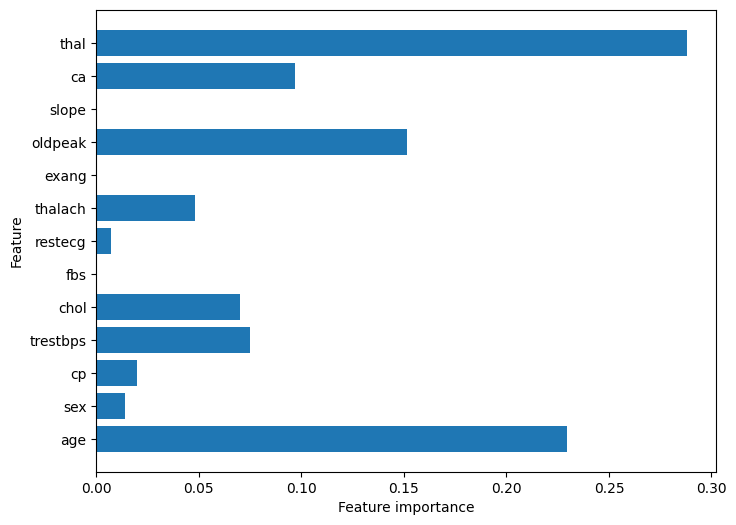

In [337]:
def plot_feature_importances_hd(model):
    plt.figure(figsize=(8,6))
    n_features = 13
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_hd(max_dt)
plt.savefig('feature_importance')

### Based on the barplot above, we can deduce that thal has the greatest importance in predicting heart disease based on the decision tree classification model.

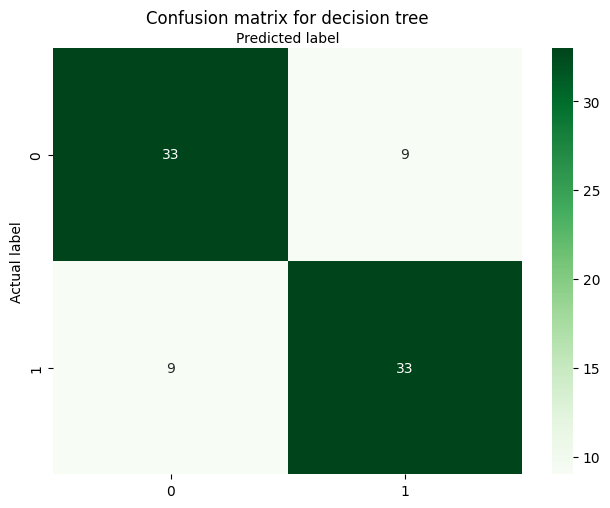

In [338]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for decision tree')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

The Confusion Matrix True Positive value is 33 and true Negative is 33. And the False Positive came out to be 9 and False Negative is 9.

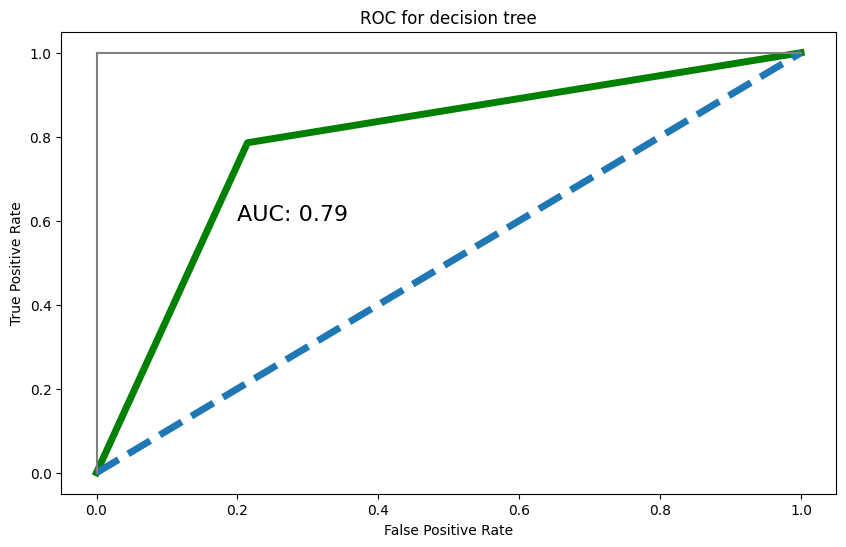

In [339]:
from sklearn.metrics import roc_auc_score,roc_curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_pred)
plt.figure(figsize=(10,6))
plt.title('ROC for decision tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_pred)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

ROC Curves summarizes the trade-off between the true positive rate and the false positive rate for the predictive model using different probability thresholds.

The accuracy of the ROC curve came out to be 79%.

In [340]:
sklearn.metrics.roc_auc_score(y_test,y_pred)*100

78.57142857142856

### K-Nearest Neighbours Classification Model

In [341]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

In [342]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3,shuffle=True)
k_range=range(1,26)
scores={}
h_score = 0       # to find the best score
best_k=0          # to find the best k
scores_list=[]  

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    prediction_knn=knn.predict(X_test)
    scores[k]=accuracy_score(y_test,prediction_knn)
    if scores[k]>h_score:
        h_score = scores[k]
        best_k = k

    scores_list.append(accuracy_score(y_test,prediction_knn))
print('The best value of k is {} with score : {}'.format(best_k,h_score))

The best value of k is 14 with score : 0.8214285714285714


In [343]:
knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [344]:
prediction_knn=knn.predict(X_test)
accuracy_knn=accuracy_score(y_test,prediction_knn)*100
print('accuracy_score score     : ',accuracy_score(y_test,prediction_knn)*100,'%')
print('mean_squared_error score : ',mean_squared_error(y_test,prediction_knn)*100,'%')

accuracy_score score     :  82.14285714285714 %
mean_squared_error score :  17.857142857142858 %


### The KNN model has an accuracy score of 82.1% in correctly predicting the Heart Disease

### Now we try to find the most important feature in the KNN Model. To do this, we used the permutation feature importance method provided by sci-kit-learn. This method works by randomly permuting the values of each feature and then measuring how much the performance of the KNN algorithm decreases as a result. The larger the decrease in performance, the more important the feature is considered to be.

In [345]:
result = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)
print(result.importances_mean)

[-0.0202381   0.00595238  0.07857143 -0.00238095  0.01190476  0.00952381
 -0.01071429  0.02380952  0.01904762  0.03214286  0.00714286  0.05
  0.01190476]


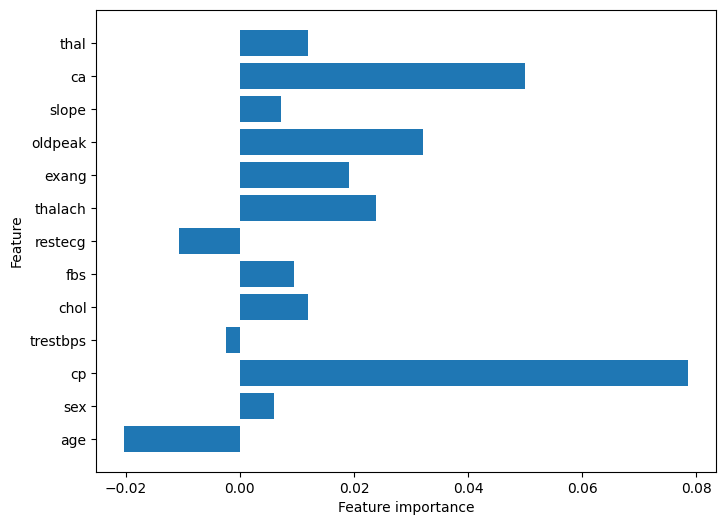

In [346]:
def plot_feature_importances_hd(model):
    plt.figure(figsize=(8,6))
    n_features = 13
    plt.barh(range(n_features), result.importances_mean, align='center')
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_hd(knn)
plt.savefig('feature_importance')

### Based on the barplot above, "cp" is the most important feature in predicting heart diseases using the KNN model. "restecg","trestbps","age" has a negative permutation feature importance score. This means that permuting the feature has no effect on the model's performance or the model is not relying on that feature to make accurate predictions, or the feature may be harming the model's performance. 

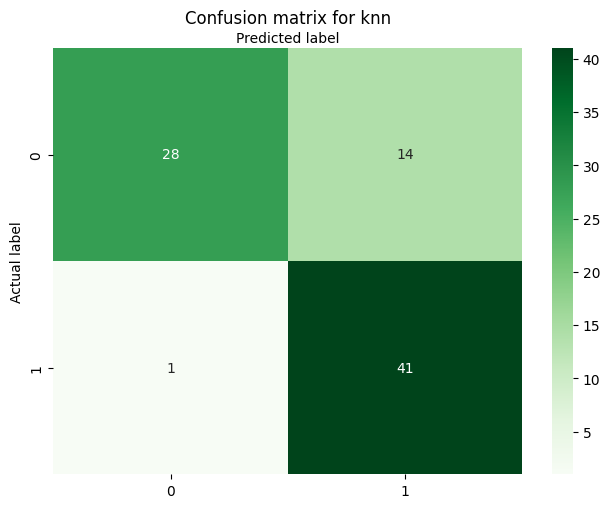

In [347]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,prediction_knn)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for knn')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

The Confusion Matrix True Positive value is 41 and true Negative is 28. And the False Positive came out to be 1 and False Negative is 14.

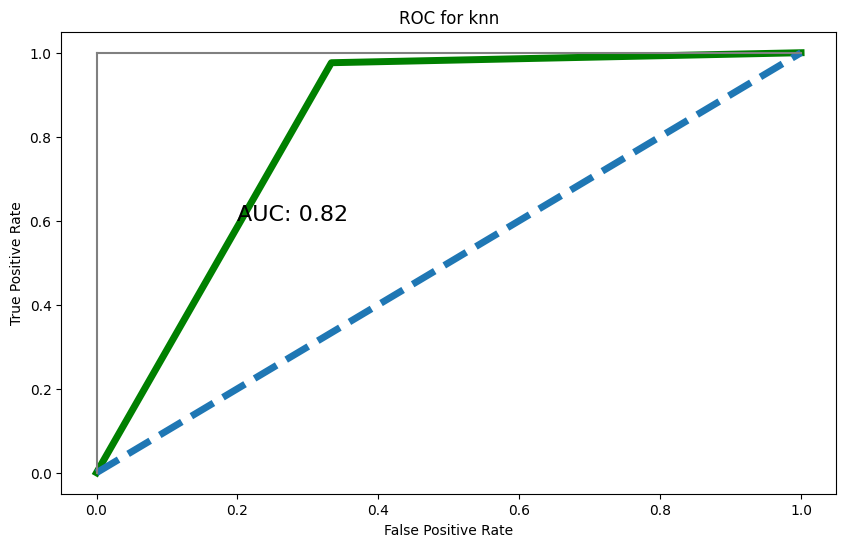

In [348]:
from sklearn.metrics import roc_auc_score,roc_curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,prediction_knn)
plt.figure(figsize=(10,6))
plt.title('ROC for knn')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,prediction_knn)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

ROC Curves summarizes the trade-off between the true positive rate and the false positive rate for the predictive model using different probability thresholds.

The accuracy of the ROC curve came out to be 82%.

In [349]:
sklearn.metrics.roc_auc_score(y_test,prediction_knn)*100

82.14285714285715

### Logistic Regression Model

In [350]:
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=6,test_size=0.3,shuffle=True)
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_prediction = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test,lr_prediction)*100
print("Accuracy Score for Logistic Regression model is:",lr_accuracy,'%')

Accuracy Score for Logistic Regression model is: 86.90476190476191 %


In [351]:
print('mean_squared_error score : ',mean_squared_error(y_test,lr_prediction)*100,'%')

mean_squared_error score :  13.095238095238097 %


### The accuracy score of the Logistic Regression model in predicting heart disease is 86.90%

### Now we try to find the most important feature in the Logistic Regression Model. We do this using the coefficient value corresponding with each feature that reflects the features impact on the target variable. Features with higher absolute coefficient values are considered more important.

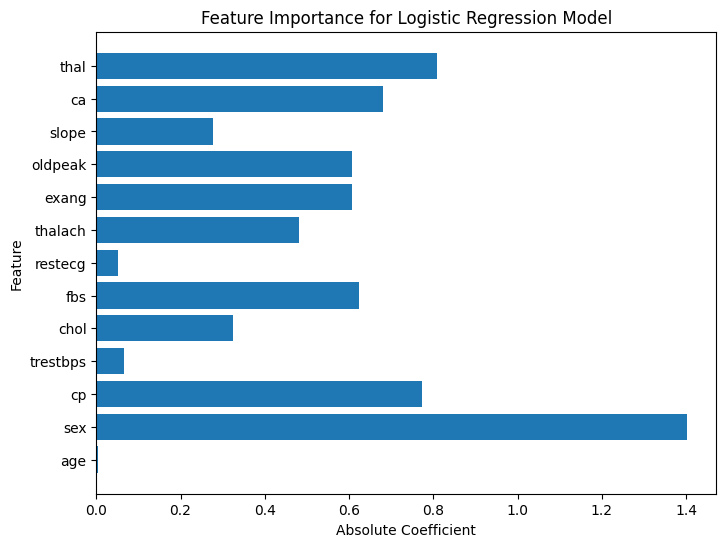

In [352]:
n_features = 13
plt.figure(figsize=(8,6))
coefs = np.abs(lr.coef_)[0]
plt.barh(range(n_features), coefs)
plt.yticks(np.arange(n_features), X)
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance for Logistic Regression Model')
plt.show()

### Based on the barplot above, we can deduce that the variable "sex" has the highest coefficient and hence has the highest feature importance with regards to predicting heart disease.

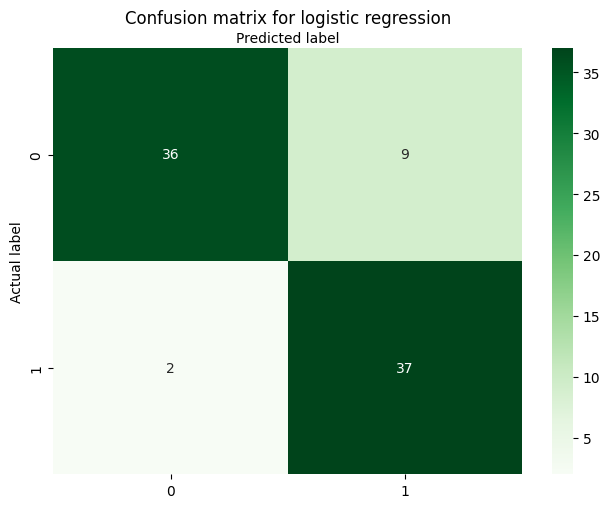

In [353]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,lr_prediction)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for logistic regression')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

The Confusion Matrix True Positive value is 37 and true Negative is 36. And the False negative came out to be 9 and False positive is 2.

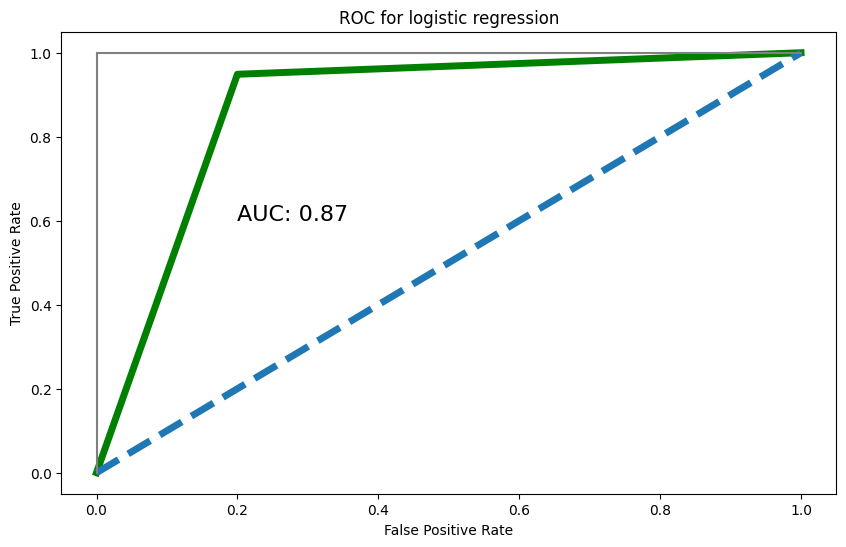

In [354]:
from sklearn.metrics import roc_auc_score,roc_curve
false_positive_rate_knn, true_positive_rate_knn, threshold_knn = roc_curve(y_test,lr_prediction)
plt.figure(figsize=(10,6))
plt.title('ROC for logistic regression')
plt.plot(false_positive_rate_knn, true_positive_rate_knn, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,lr_prediction)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

ROC Curves summarizes the trade-off between the true positive rate and the false positive rate for the predictive model using different probability thresholds.

The accuracy of the ROC curve came out to be 87%.

In [355]:
sklearn.metrics.roc_auc_score(y_test,lr_prediction)*100

87.43589743589743

## Random Forest Classifier

In [356]:
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3,shuffle=True)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
score = rf.score(X_train, y_train)
print('Training Score:', score)
score = rf.score(X_test, y_test)
print('Testing Score:', score)
rf_accuracy = accuracy_score(rf_pred,y_test)*100
print(f"Accuracy: {rf_accuracy:}",'%')

Training Score: 1.0
Testing Score: 0.8095238095238095
Accuracy: 80.95238095238095 %


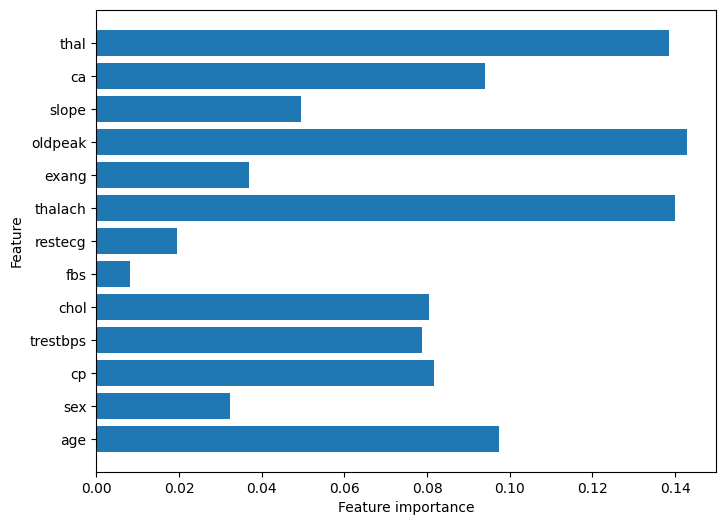

In [357]:
def plot_feature_importances_hd(model):
    plt.figure(figsize=(8,6))
    n_features = 13
    plt.barh(range(n_features), rf.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_hd(rf)
plt.savefig('feature_importance')

### Based on the barplot above, we can deduce that the variable "thal" has the highest coefficient and hence has the highest feature importance with regards to predicting heart disease. 

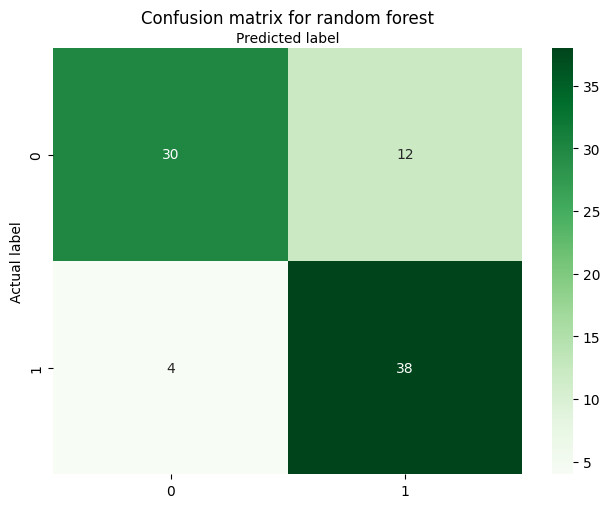

In [358]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,rf_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for random forest')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

The Confusion Matrix True Positive value is 38 and true Negative is 30. And the False Positive came out to be 4 and False Negative is 12.

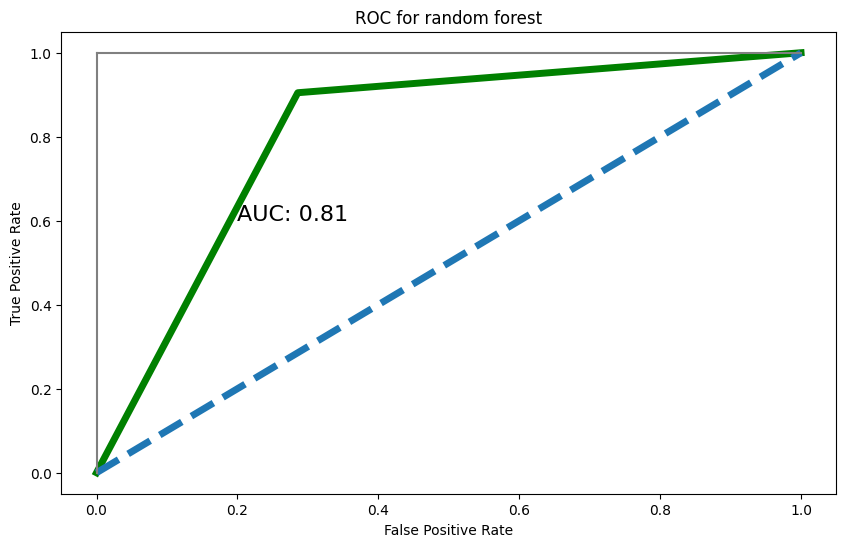

In [359]:
from sklearn.metrics import roc_auc_score,roc_curve
false_positive_rate, true_positive_rate, threshold_knn = roc_curve(y_test,rf_pred)
plt.figure(figsize=(10,6))
plt.title('ROC for random forest')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,rf_pred)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

ROC Curves summarizes the trade-off between the true positive rate and the false positive rate for the predictive model using different probability thresholds.

The accuracy of the ROC curve came out to be 81%.

In [360]:
sklearn.metrics.roc_auc_score(y_test,rf_pred)*100

80.95238095238095

# Neural Network Model

In [361]:
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [362]:
# Rename columns into lowercase characters
data.columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

In [363]:
# Split the dataset into input (X) and target (y) variables
X = finaldata.drop("target", axis=1)
y = finaldata["target"]

#Splitting the data into test(80% of the data) and train(20% of the data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [364]:
def modelfunc(lr):
    # Create the neural network model
    model = Sequential() #creates a neural network model using the Keras Sequential API

    #The first layer is a Dense layer with 64 neurons, which takes the input data with input dimension equal to the number of features
    #in the X_train dataset. The activation function used in this layer is the rectified linear unit (ReLU) activation function.
    model.add(Dense(64, input_dim=X_train.shape[1], activation="relu"))

    #The second layer is another Dense layer with 32 neurons and the ReLU activation function.
    model.add(Dense(32, activation="relu"))

    #The final layer is a Dense layer with a single neuron and the sigmoid activation function. This is because the problem 
    #is a binary classification problem, so the output of the model will be a probability between 0 and 1,
    #which represents the probability of a patient having heart disease.
    model.add(Dense(1, activation="sigmoid"))

    #The optimizer used in this model is the Adam optimizer, which is a popular stochastic gradient descent optimization algorithm. 
    #The learning rate for the optimizer is set to 0.001.
    opt = optimizers.Adam(learning_rate=lr)

    # Compile the neural network model using the "binary_crossentropy" loss function, the "opt" optimizer, 
    #and "accuracy" as the evaluation metric.

    model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

    # The "binary_crossentropy" loss function is typically used for binary classification problems, where the goal 
    # is to predict between two classes(here the target variable). It measures the difference between the predicted probability 
    # distribution and the actual probability distribution of the binary target variable.
    
    return model

In [365]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint filename
lr = 0.0678
checkpoint_filepath = f'best_model_{lr}.h5'

# Create a ModelCheckpoint callback to save the weights with the highest validation accuracy
checkpoint = ModelCheckpoint(
    checkpoint_filepath,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

model = modelfunc(lr)
model.fit(
    X_train, y_train,
    epochs=60,
    batch_size=32,
    validation_split=0.1,
    verbose=0,
    callbacks=[checkpoint] # Add the checkpoint callback here
)




Epoch 1: val_accuracy improved from -inf to 0.60870, saving model to best_model_0.0678.h5

Epoch 2: val_accuracy improved from 0.60870 to 0.69565, saving model to best_model_0.0678.h5

Epoch 3: val_accuracy improved from 0.69565 to 0.82609, saving model to best_model_0.0678.h5

Epoch 4: val_accuracy did not improve from 0.82609

Epoch 5: val_accuracy did not improve from 0.82609

Epoch 6: val_accuracy did not improve from 0.82609

Epoch 7: val_accuracy did not improve from 0.82609

Epoch 8: val_accuracy did not improve from 0.82609

Epoch 9: val_accuracy did not improve from 0.82609

Epoch 10: val_accuracy did not improve from 0.82609

Epoch 11: val_accuracy did not improve from 0.82609

Epoch 12: val_accuracy did not improve from 0.82609

Epoch 13: val_accuracy did not improve from 0.82609

Epoch 14: val_accuracy did not improve from 0.82609

Epoch 15: val_accuracy did not improve from 0.82609

Epoch 16: val_accuracy did not improve from 0.82609

Epoch 17: val_accuracy did not improv

In [366]:
model.load_weights(checkpoint_filepath)
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)

2/2 [==============================] - 0s 2ms/step - loss: 1.1228 - accuracy: 0.8750


In [367]:
# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0) 

'''The model.evaluate() function will compute the loss function and the accuracy metric of the trained model on the test set, 
and return these values as a tuple. The verbose argument controls the amount of output that will be printed during the 
evaluation process, and if verbose is set to 0, the function will not print any output during the evaluation.'''

print(f"Accuracy: {accuracy:.2f}") #Printing the accuracy of the neural network used to predict the target value
print(loss)#Prints the loss 

Accuracy: 0.88
1.1227539777755737


In [368]:
acc_list = []
acc_list.append(accuracy_knn)
acc_list.append(lr_accuracy)
acc_list.append(rf_accuracy)
acc_list.append(maxi)
acc_list.append(accuracy*100)
print(acc_list)

[82.14285714285714, 86.90476190476191, 80.95238095238095, 80.95238095238095, 87.5]


In [369]:
models = ["KNN","Logistic Regression","Random Forest","Decision Tree Classifier","Neural Network"]

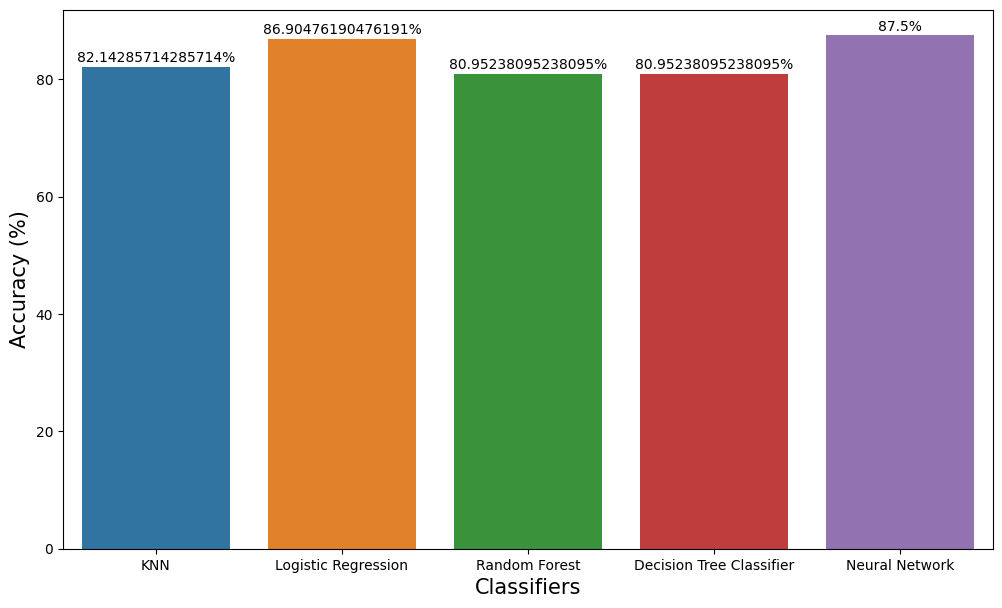

In [370]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=models,y=acc_list)
plt.xlabel("Classifiers", fontsize = 15)
plt.ylabel("Accuracy (%)", fontsize = 15)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height}%",(x+ width/2,y+ height*1.01),ha="center")

## Predictive Model

In [2]:
# Using custom input from the data
custom_input = [[45, 1, 2, 130, 234, 0, 1, 175, 0, 0.6, 2, 0, 2]]

# Load the saved model weights
model.load_weights(checkpoint_filepath)

# Use the predict() method to make a prediction on the custom input
prediction = model.predict(custom_input)

# Round the predicted probability to the nearest integer to get a binary prediction
prediction = round(prediction[0][0])

# Print the prediction
if prediction == 1:
    print("You are likely to have a heart disease based on our model. Our model has an accuracy score of 87%")
    print("You are advised to see a doctor and work on a healthy lifestyle")
else:
    print("You are not likely to have heart disease based on our model. Our model has an accuracy score of 87%")
    print("Keep up your healthy lifestyle")

You are likely to have a heart disease based on our model. Our model has an accuracy score of 87%
You are advised to see a doctor and work on a healthy lifestyle


### Insights Gained from Binary Classification Models

1. Based on the accuracy scores of the following machine learning models, we can deduce that the Neural Network model is the most accurate model in predicting whether a person has heart disease or not as the model has the highest classification accuracy 

2. Based on the feature importance graphs of the 4 different models, we deduced that different variables have differing levels of importance for the the 4 different models. However, the feature of "thal" (blood disorder called thalassemia) has the highest feature importance for the Random Forest and Decision Tree classification model, hence we can deduce that "thal" is the most important variable in predicting heart disease as this variable is deemed to be the most important by 2 Machine Learning models. 

    The most important feature for the KNN model is "Chestpain" and the most important feature for the Logistic Regression model is "sex". This may not be accurate as based on our exploratory data analysis, we saw that there was no direct relationship between sex and presence of heart disease.
    
    This is line with our initial prediction based on our EDA that categorical variables have a stronger relationship with the    target variable compared to the numeric variables. From all the graphs regarding variable importance, categorical variables such as "cp","fbs","slope","ca","thal" have significant variable importance.

3. Early detection: Machine learning models can identify patterns and trends in patient data that indicate the early stages of heart disease & factors that can cause heart disease. For example, if doctors determine that a patient has "thal" type 1 (fixed defect: no blood flow in some part of the heart) and type 3 (reversible defect: a blood flow is observed but it is not normal), the doctor can conclude that there is a higher chance that this patient will have a heart disease compared to not having a heart disease. This can help doctors diagnose the condition at an earlier stage, allowing for earlier intervention and treatment.

    If doctors determine that a patient has "CP" (Chest Pain) type 1,2,3, the doctor can conclude that there is a higher chance that this patient will have a heart disease compared to not having a heart disease. This is in line our count plot of Chest Pain type vs Total number of people with heart disease as well as our deduction from the Machine Learning models that Chest Pain is the most important feature for the KNN model in predicting heart disease. 

### Recommendations

1. We had to use different metrice to deduce which variable is the most important in predicting heart disease. For the Decision Tree classifier & Random Forest Classifier we could use the in built feature importance method, however for the KNN model, we had to use the "permutation feature importance method". This method works by randomly permuting the values of each feature and then measuring how much the performance of the KNN algorithm decreases as a result. The larger the decrease in performance, the more important the feature is considered to be. For the Logistic Regression model, we used the coefficient value method. In logistic regression, each feature has a corresponding coefficient value that reflects its impact on the target variable. Features with higher absolute coefficient values are considered more important. Since we had to use different metrics across the different models to measure the feature importance, this could have had an effect on accuracy of the feature importance. Hence a recommendation would be to use the same metrics to measure the feature importance if possible.


2. For better accuracy in predicting the most important feature in determining heart disease, we could have used a dataset with all possible factors that can help predict heart disease such as patient medical records, lab results, lifestyle factors, and genetic data. This would have helped to ensure that the models were able to capture a broad range of risk factors.

3. We could have used advanced machine learning techniques, such as deep learning and reinforcement learning, which can help improve the accuracy of heart disease prediction models. These techniques can help identify complex patterns and relationships in the data that might not be apparent using traditional machine learning algorithms.

### Final Insights about the Machine Learning Models (Advantages & Disadvantages)

Through this project, we managed to uncover several advantages and disadvantages about the Machine Learning models. 

1. Decision Tree Classifier and Random Forest Classifier have an in built "Feature Importance" function which helps us deduce the importance of the features in the classification accurately. This is an advantage for these 2 models compared to Logistic Regression and KNN which do not have this feature.


2. The Decision Tree Classifer model can easily overfit the training data, resulting in poor generalization on unseen data which makes this a disadvantage. However, the Random Forest Classifier reduces the problem of overfitting the training data as this model aggregates multiple decision trees and makes the prediction more accurate, which is an advantage of the Random Forest Classifier.


3. The Logistic Regression model may not always be the most accurate model as this model assumes a linear relationship between the input variables and the output variable, which may not always be the case. This can be seen from the correlation matrix plotted in our EDA where the correlation continuous variables was low, which could result in a lower accuracy for the results. This is a disadvantage for this model.


4. The performance of the KNN model depends on the value of K and the performance of the model can degrade significantly if the value of k is too small or too large, which is a disadvantage of this model. This is why we utilised the KNN model in a way that finds the optimal value of K which gives us the maximum accuracy and through this method we were able to overcome the disadvantage of this model.


5. Neural network models have the advantage of being able to handle highly complex and non-linear relationships between input and output variables.